# Imputación usando Machine Learning

En este ejemplo, vamos a ver como podemos usar modelos de Machine Learning, por ejemplo, la regresión lineal para hacer una mejor estimación de los datos faltantes!

**Saber más:** https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/

In [ ]:
#### Paquetes

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score

import warnings
warnings.filterwarnings("ignore")

#### Imputación simple

In [ ]:
df = pd.read_csv("../data/2008_small.zip",nrows = 1000000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay","CarrierDelay"]] 
X

In [ ]:
X.isna().sum()

In [ ]:
X.mean()

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(X)       

In [ ]:
X = imp.fit_transform(X)

In [ ]:
pd.DataFrame(X).describe()

>Una aproximación más sólida basada en las relaciones presentes en los datos...

In [ ]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay","CarrierDelay"]] 
X.corr()

In [ ]:
X = X.dropna(subset=["DepDelay","ArrDelay","TaxiOut"])
newX = X[["DepDelay","ArrDelay","TaxiOut","CarrierDelay"]] 
#Aquí no hay Nans en las 3 columnas explicativas, y sí los hay en CarrierDelay

train = newX[np.isnan(X.CarrierDelay)==False] #No hay Nans
train

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(train[["DepDelay","ArrDelay","TaxiOut"]], train["CarrierDelay"])

In [ ]:
regr.intercept_

In [ ]:
regr.coef_

In [ ]:
r2_score( train["CarrierDelay"],regr.predict(train[["DepDelay","ArrDelay","TaxiOut"]])  )

>Los datos con los que ha aprendido el modelo

In [ ]:
train

In [ ]:
test = newX[np.isnan(X.CarrierDelay) == True]
test_X = test[["DepDelay","ArrDelay","TaxiOut"]] # Solo las columnas X

>Los datos que vamos a usar para imputar el valor de CarrierDelay

In [ ]:
test

In [ ]:
imputacion = regr.predict(test_X)
imputacion

In [ ]:
np.mean(imputacion)

>Sobreescribimos los datos imputados en el objeto original

In [ ]:
X.loc[np.isnan(X.CarrierDelay),"CarrierDelay"] = imputacion

In [ ]:
X.CarrierDelay[X.CarrierDelay < 0] = 0

In [ ]:
X

# Reducción de Dimensionalidad. PCA

Principal Component Analysis, basado en la reestructuración de las variables (columnas) para agrupar más porcentaje de varianza.

"PCA = Reducir dimensiones, Preservar información"

**Saber más:** https://medium.com/all-about-ml/understanding-principal-component-analysis-pca-556778324b0e

In [ ]:
df = pd.read_csv("../data/2008_small.zip",nrows = 1000000)

df = df.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay"])
df = df.sample(frac=1).head(1000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay"]] 
columnas = X.columns

In [ ]:
X

In [ ]:
scaler = StandardScaler()   ## IMPORTANTISIMO ##
scaler.fit(X)

X = scaler.transform(X)

pca = PCA(n_components=2) # El numero de componentes son la cantidad de nuevas columnas que quiero
pca.fit(X)

In [ ]:
pca.components_

In [ ]:
columnas

In [ ]:
X

In [ ]:
print(np.round(pca.components_,2)) # nuevas columnas x viejas columnas

In [ ]:
columnas

In [ ]:
pd.DataFrame(np.round(pca.components_,2),columns=columnas)

# 1a componente, vuelos largos y retrasos altos (vuelos cortos, retrasos bajos)
# 2a componente, vuelos cortos y retrasos altos (vuelos largos, retrasos bajos)

>La interpretación de los datos se relaciona de manera directa con las columnas originales

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
nuevosvalores = pca.transform(X)
nuevosvalores

>Visualizar la transformación del espacio

In [ ]:
plt.scatter(nuevosvalores[:,0],nuevosvalores[:,1],)
plt.xlabel("Primera NUEVA columna: vuelos largos y retrasos altos")
plt.ylabel("Segunda NUEVA columna: vuelos cortos y retrasos altos")
plt.show()

## Ejercicios. Imputación y PCA


1. Ejecuta el siguiente código para generarte unos datos de ejemplo con NAs

In [ ]:
from pydataset import data

iris = data('iris')
iris["Petal.Length"][np.random.uniform(0, 1, size=iris.shape[0]) >.8]= np.nan
posicionesna = np.isnan(iris["Petal.Length"])
iris.head()

2. Utilizando las técnicas que hemos visto hasta ahora, prueba de imputar los datos faltantes usando la media o la mediana

3. Usando las demás columnas que consideres relevantes, imputa los valores faltantes mediante un modelo de regresión lineal

4. Visualiza los datos iris completos usando PCA (convirtiendo 4 columnas en 2).

5. Usando Kmeans, el clustering jerárquico o cualquier otro algoritmo de agrupación, visualiza los resultados de agrupar el dataframe iris, con los dos primeros componentes principales

6. (Extra) Ajustar un modelo de regresión/clasificación para predecir alguna variable, usando nuevas columnas PCA como variables predictoras

# Support Vector Machine

Los SVM son algoritmos de clasificación y regresión que representan transformaciones de los datos más flexibles que las relaciones lineales.

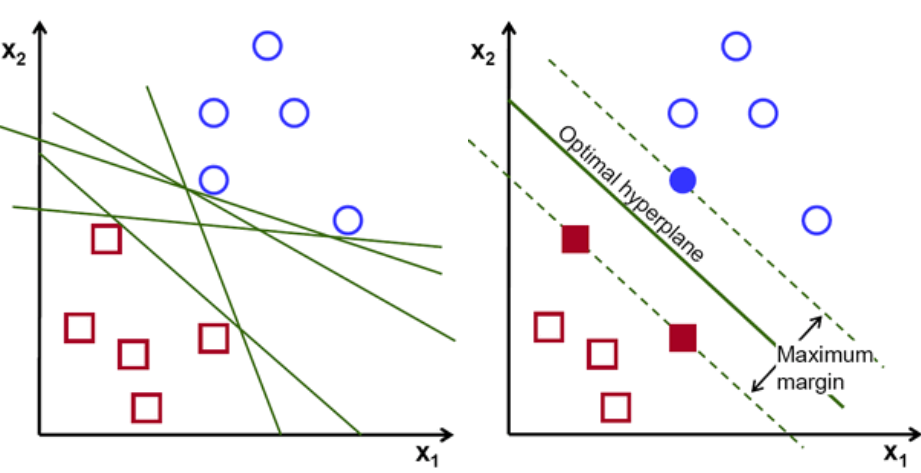

#### Ejemplo Sencillo

In [ ]:
df = pd.read_csv("../data/2008_small.zip",nrows = 10000)

df = df.dropna(subset =['AirTime','Distance','TaxiIn','TaxiOut'])
df = df.sample(frac=1).head(2000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut']] 
Y = df['ArrDelay'] > np.median(df["ArrDelay"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [ ]:
np.mean(Y)

In [ ]:
# Si se queda infinitamente atrapado, tenemos que rearrancar, pero con parámetros de parada.
# max_iter // tol // cache

svc = svm.SVC(C = 0.1,kernel = 'linear', tol = 1e-2)
svc.fit(X_train, y_train)
np.mean( svc.predict(X_test) == y_test)

#### Parámetros de un SVM:
    
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
- C: Parámetro de complejidad
- kernel (transformación de los datos) {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

## Automatic parameter Tuning / Model estimation

Not working really fast :'(

In [ ]:
# parameters = {'kernel':('linear', 'poly','rbf'), 'C':[1,5,10]}
parameters = {'kernel':('linear','rbf','poly','sigmoid'), 'C':[0.001,0.01,0.05,0.1,0.5]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,verbose=3,n_jobs=-1)
clf.fit(X, Y)

print("DONE")

¿Qué es la Búsqueda de cuadrícula con Cross Validation?

In [ ]:
clf.cv_results_

>Nos permite dar una **primera intuición de los parámetros que funcionan mejor**

In [ ]:
clf.best_params_

In [ ]:
clf.cv_results_['mean_test_score']

In [ ]:
clf.best_score_

# Neural Networks

Una explicación visual de las redes neuronales

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.44747&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

En resumen, se trata de un modelo clasificador/regresor que busca detectar patrones mediante la combinación de transformaciones de los datos, las llamadas "neuronas".

In [ ]:
df = pd.read_csv("../data/2008_small.zip",nrows = 1000000)

df = df.dropna(subset =['AirTime','Distance','TaxiIn','TaxiOut'])
df = df.sample(frac=1).head(10000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut']] 
Y = df['ArrDelay']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train) # conocimiento

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regr = MLPRegressor(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(10,10,10)) #The ith element represents the number of neurons in the ith hidden layer.

model = regr.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R cuadrado: ",r2_score(y_test, predictions))

>Comparamos con el modelo de regresión lineal

In [ ]:
regrLin = linear_model.LinearRegression()
regrLin.fit(X_train,y_train)
y_pred = regrLin.predict(X_test)
print("R cuadrado: ",r2_score(y_test, y_pred))

>Algunos de los parámetros con los que podemos jugar en los modelos de red neurnal son:
>   
>- solver: {‘lbfgs’, ‘sgd’, ‘adam’}    
>- activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
>- alpha : float, optional, default 0.0001 L2 penalty
>- learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}

>Considerar la cantidad de combinaciones posibles de parámetros...\
>https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

### Selección de parámetros automatizada (sin funciones)

Más potente, más flexible, más control... pero requiere más código...

In [ ]:
# Modelo con 3 capas

alphas = [0.0000001,0.001,0.1]
layers = [2,5,10,20]
solvers = ["lbfgs","adam","sgd"]
listtodf = []
i = 0
print("Iterations:", len(alphas)*len(layers) ** 3 *len(solvers))

for alpha in alphas:
    for layer1 in layers: 
        for layer2 in layers:
            for layer3 in layers:
                for solver in solvers:
                    i += 1 # i = i + 1 // i++
                    regr = MLPRegressor(solver=solver, alpha=alpha, hidden_layer_sizes=(layer1,layer2,layer3),warm_start=True)
                    model = regr.fit(X_train, y_train)
                    predictions = model.predict(X_test)
                    print(i, 
                          "R cuadrado: ",round(r2_score(y_test, predictions),2), 
                          " Solver: ",solver, 
                          " Layer size: ", (layer1,layer2,layer3),
                          " Alpha: ",alpha)
                    listtodf.append([alpha,(layer1,layer2,layer3),solver,r2_score(y_test, predictions)])

In [ ]:
listtodf

>Obteniendo conclusiones sobre los datos

In [ ]:
parameters = pd.DataFrame(listtodf, columns =['Alphas', 'Layers','Solvers','R2']) 
parameters.to_csv("parameters.csv")

In [ ]:
parameters = pd.read_csv("parameters.csv",index_col = 0)
parameters

In [ ]:
parameters.groupby("Alphas").mean()["R2"].sort_values(ascending = False)

In [ ]:
parameters.groupby("Layers").mean()["R2"].sort_values(ascending = False)

In [ ]:
parameters.groupby("Solvers").mean()["R2"].sort_values(ascending = False)

In [ ]:
parameters[parameters.R2 == max(parameters.R2)]

## Ejercicio

Intenta clasificar/predecir lo mejor que puedas los datos de iris o algún dataset sencillo, usando uno de los dos modelos que hemos visto (SVM y NN). Puedes usar una de las columnas numéricas como respuesta (regresión) o la columa "species" (clasificación).

Aprovecha para añadir nuevas variables (feature engineering), seleccionar alguno de los parámetros que funcionan mejor con estos datos, etc.

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.